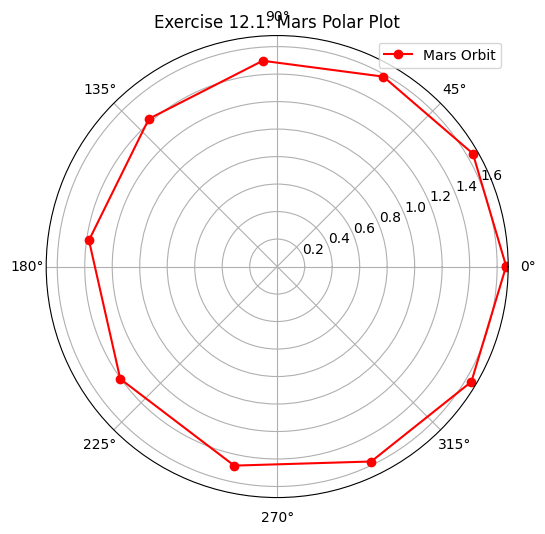

Calculated distances (AU): [1.6663416  1.64368339 1.58284356 1.50087577 1.42351907 1.38279145
 1.40406796 1.48151503 1.57459713 1.64266311 1.66634078]


In [34]:
import numpy as np
import matplotlib.pyplot as plt

#Given parameters

P = 686.98      # Orbital period in Earth days
e = 0.0934      # Eccentricity
a = 1.524       # Semi-major axis in AU

# Time vector
t = np.linspace(0, P, 11)

theta = np.zeros(len(t))
theta[0] = 0

#Using for loop to iterate through forward finite difference method
for i in range(len(t) - 1):
    dt = t[i+1] - t[i]
    numerator = (1 - e * np.cos(theta[i]))**2
    denominator = (1 - e**2)**(1.5)

    # Using the given formula, we get
    theta[i+1] = theta[i] + (2 * np.pi / P) * (numerator / denominator) * dt

# Calculating r value
def calculate_r(theta_val):
    return (a * (1 - e**2)) / (1 - e * np.cos(theta_val))

r = calculate_r(theta)

# Plotting the  polar plot
plt.figure(figsize=(6, 6))
plt.polar(theta, r, 'ro-', label='Mars Orbit')
plt.legend(loc=1)
plt.title('Exercise 12.1: Mars Polar Plot')
plt.show()

print(f"Calculated distances (AU): {r}")

The calculated maximum and minimum values are pretty close to the original theoretical values, therefore the results are plausible.

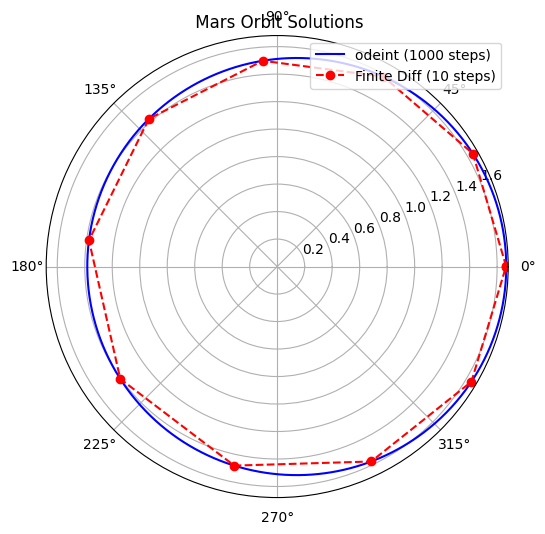

Aphelion : 1.6663 AU
Perihelion : 1.3817 AU


In [35]:
#12.2

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Given parameters
P = 686.98      # Period in days
e = 0.0934      # Eccentricity
a = 1.524       # Semi-major axis in AU

#  Defining the differential equation
def orbit_model(theta, t):
    numerator = (2 * np.pi / P) * (1 - e * np.cos(theta))**2
    denominator = (1 - e**2)**1.5
    dtheta_dt = numerator / denominator
    return dtheta_dt

# The time vector in minimum 100 timesteps and initial condition
t_new = np.linspace(0, P, 1000)
theta0 = 0

# 3. Solving using using odeint
theta_ode = odeint(orbit_model, theta0, t_new)

# r theta and distance calculation
def calc_r(theta_val):
    return (a * (1 - e**2)) / (1 - e * np.cos(theta_val))

r_new = calc_r(theta_ode)

# Comparing with 12.1
t = np.linspace(0, P, 11)
theta = np.zeros(11)
for i in range(len(t)-1):
    dt = t[i+1] - t[i]
    dtheta = (2*np.pi/P) * (1-e*np.cos(theta[i]))**2 / (1-e**2)**1.5
    theta[i+1] = theta[i] + dtheta * dt
r = calc_r(theta)

# Lets plot both the solutions
plt.figure(figsize=(8, 6))
plt.polar(theta_ode, r_new, 'b-', label='odeint (1000 steps)')
plt.polar(theta, r, 'ro--', label= 'Finite Diff (10 steps)')
plt.legend(loc=1)
plt.title(" Mars Orbit Solutions")
plt.show()

# Calculating the minimum and maximum distances
print(f"Aphelion : {np.max(r_new):.4f} AU")
print(f"Perihelion : {np.min(r_new):.4f} AU")

Thye calulated values are really very close to the literature values.There is only a slight difference of 0.0003 AU.

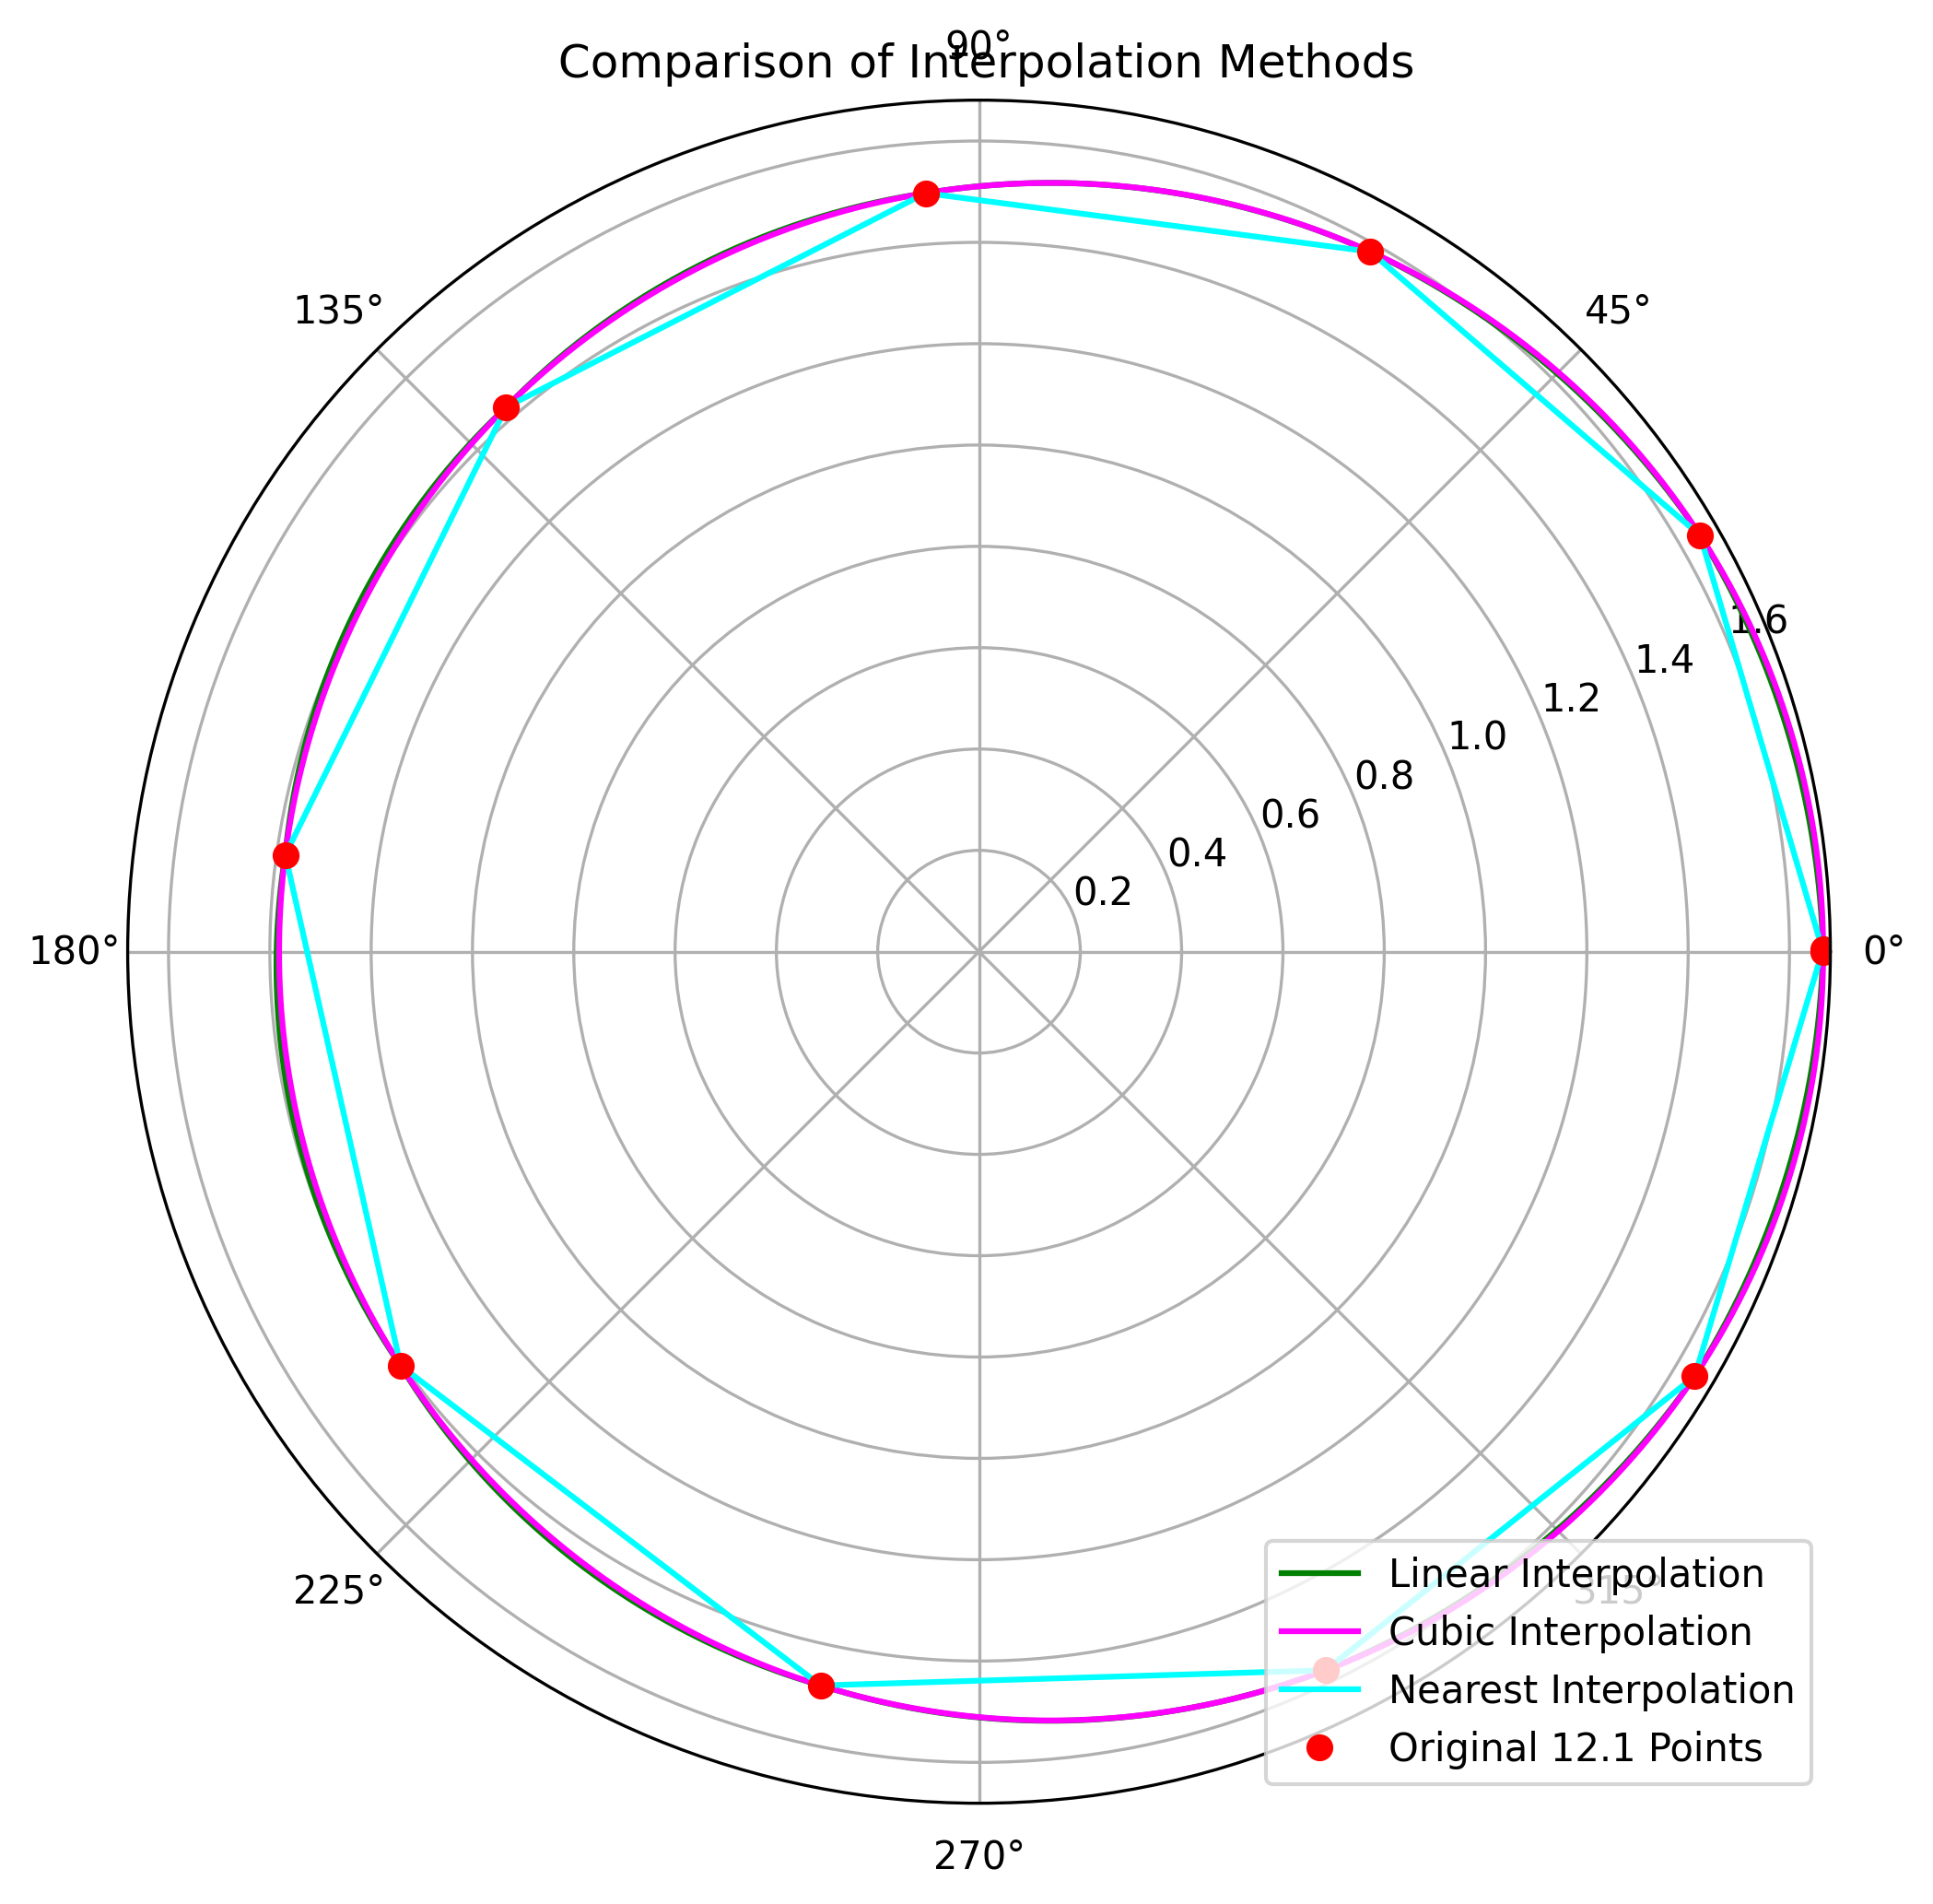

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

P = 686.98
e = 0.0934
a = 1.524

# Time vector from 12.1
t = np.linspace(0, P, 11)
theta = np.zeros(11)
for i in range(len(t)-1):
    dt = t[i+1] - t[i]
    theta[i+1] = theta[i] + (2*np.pi/P) * ((1-e*np.cos(theta[i]))**2 / (1-e**2)**1.5) * dt
r = (a * (1 - e**2)) / (1 - e * np.cos(theta))

# Time vector from 12.2
t_new = np.linspace(0, P, 1000)

# Using different interpolation methods
methods = ['linear', 'cubic', 'nearest']

# Initializing empty dictionaries to store results
interp_theta = {}
interp_r = {}

for m in methods:
    # Interpolating theta
    interp_theta[m] = griddata(t, theta, t_new, method=m)
    # Interpolating r
    interp_r[m] = griddata(t, r, t_new, method=m)

# Plotting the results
plt.figure(figsize=(10, 8), dpi=300)

plt.polar(interp_theta['linear'], interp_r['linear'], label='Linear Interpolation', color='green')
plt.polar(interp_theta['cubic'], interp_r['cubic'], label='Cubic Interpolation', color='magenta')
plt.polar(interp_theta['nearest'], interp_r['nearest'], label='Nearest Interpolation', color='cyan')

plt.polar(theta, r, 'ro', label='Original 12.1 Points')

plt.title(" Comparison of Interpolation Methods")
plt.legend(loc='lower right')
plt.show()

Of all the interploation methods, cubic interploation seems to be the best fitting smoothest orbital path.Linear interpolation also provides much better results compared to nearest interpolation but still there are sharp edges.Nearest interpolation appears as a series of straight line segments showing a blocky appearance.